In [9]:
from scipy.stats import multivariate_normal
from pandas import read_csv, DataFrame, option_context
import numpy as np
from matplotlib import pyplot

## Config Vars

In [193]:
conf_error_vects_path = 'data/error_vects.csv'
shifts = 5
threshold = 2.8237531487356081629

## Load Dataset

In [3]:
error_vects_full = read_csv(conf_error_vects_path , header=0, index_col=0)

## Seperate data

In [41]:
train = error_vects_full.shape[0] * 1 // 2
    
error_vects = error_vects_full.iloc[:-train]

error_vects_test = error_vects_full.iloc[-train:]

In [42]:
error_vects.head()

,1,2,3,4,5,anomaly
40005,0.123424,0.045200,0.079927,0.042901,0.040250,0
40006,0.105297,0.052409,0.088465,0.042162,0.055348,0
40007,0.134524,0.082048,0.100894,0.050427,0.059879,0
40008,0.126766,0.076376,0.056537,0.044315,0.047346,0
40009,0.108198,0.074582,0.047986,0.040245,0.041925,0


## Calculate Means and covariance matrix of error vects

In [43]:
means = error_vects[error_vects.columns[:-1]].mean()
covariance = error_vects[error_vects.columns[:-1]].cov()

In [47]:
np.array(error_vects_test[error_vects_test.columns[:-1]].iloc[row])

array([0.2840153 , 0.09611274, 0.19904995, 0.14765156, 0.12228825])

## Creating the Model

In [44]:
g_model = multivariate_normal(mean=means, cov=covariance)

In [55]:
error_val = DataFrame(columns = ['error'])
for row in range(error_vects_test.shape[0]):
    val = g_model.pdf(np.array(error_vects_test[error_vects_test.columns[:-1]].iloc[row]))
#     print(val*10**35)
    error_val.loc[row] = val*10**35
error_val.index = error_vects_test.index
error_val[["anomaly"]] = error_vects_test[["anomaly"]]

In [194]:
with option_context('display.float_format', '{:0.20f}'.format):
    with option_context('display.max_rows', None, 'display.max_columns', None):
        print(error_val)


                       error  anomaly  pred
45003 2.82375318751350157243        0     1
45004 2.82375318503291206085        0     1
45005 2.82375317997735297837        0     1
45006 2.82375316885504989983        0     1
45007 2.82375317703268358116        0     1
45008 2.82375317897483624208        0     1
45009 2.82375318744099024215        0     1
45010 2.82375317497444111581        0     1
45011 2.82375317891853683250        0     1
45012 2.82375318886581316846        0     1
45013 2.82375314667408661151        0     0
45014 2.82375317826003691124        0     1
45015 2.82375313790978221817        0     0
45016 2.82375314250021869356        0     0
45017 2.82375313479537259909        0     0
45018 2.82375316417304134120        0     1
45019 2.82375313965651209003        0     0
45020 2.82375314082776629476        0     0
45021 2.82375314284716516511        0     0
45022 2.82375320324746903466        0     1
45023 2.82375319259060963972        0     1
45024 2.82375313987215914580    

In [57]:
error_val_anomaly = error_val[error_val.anomaly == 1]
error_val_non_anomaly = error_val[error_val.anomaly == 0]

In [89]:
xmarks=[i for i in range(42000,50000+1,50)]

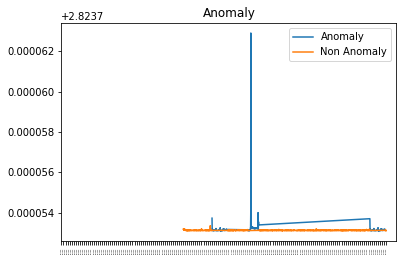

In [90]:
pyplot.figure()
pyplot.plot(error_val_anomaly['error'], label='Anomaly')
pyplot.plot(error_val_non_anomaly['error'], label='Non Anomaly')
pyplot.xticks(xmarks)
pyplot.xticks(rotation=90, fontsize=2)
pyplot.legend()
pyplot.title("Anomaly")
pyplot.savefig('graph.png', dpi=1000)
pyplot.show()

In [192]:
def thresh():
    def func(x):
        if(x.error > threshold):
            return 1
        return 0
    return func

error_val['pred'] = error_val.apply(thresh(), axis=1)
from sklearn.metrics import precision_recall_fscore_support as score, accuracy_score
accuracy_score(error_val['anomaly'], error_val['pred'], normalize=True, sample_weight=None)

NameError: ("name 'threshold' is not defined", 'occurred at index 45003')

In [180]:
# from sklearn.metrics import precision_recall_fscore_support as score, accuracy_score
accuracy_score(error_val['anomaly'], error_val['pred'], normalize=True, sample_weight=None)

0.8531118671202722

In [96]:
with option_context('display.float_format', '{:0.20f}'.format):
    with option_context('display.max_rows', None, 'display.max_columns', None):
        print(error_val)

                       error  anomaly  pred
45003 2.82375318751350157243        0     1
45004 2.82375318503291206085        0     1
45005 2.82375317997735297837        0     1
45006 2.82375316885504989983        0     1
45007 2.82375317703268358116        0     1
45008 2.82375317897483624208        0     1
45009 2.82375318744099024215        0     1
45010 2.82375317497444111581        0     1
45011 2.82375317891853683250        0     1
45012 2.82375318886581316846        0     1
45013 2.82375314667408661151        0     1
45014 2.82375317826003691124        0     1
45015 2.82375313790978221817        0     1
45016 2.82375314250021869356        0     1
45017 2.82375313479537259909        0     0
45018 2.82375316417304134120        0     1
45019 2.82375313965651209003        0     1
45020 2.82375314082776629476        0     1
45021 2.82375314284716516511        0     1
45022 2.82375320324746903466        0     1
45023 2.82375319259060963972        0     1
45024 2.82375313987215914580    

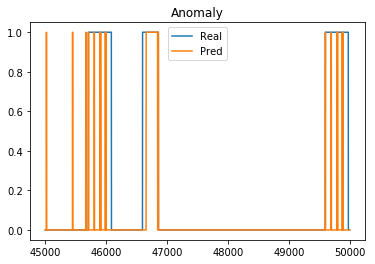

In [75]:
pyplot.figure()
pyplot.plot(error_val['anomaly'], label='Real')
pyplot.plot(error_val['pred'], label='Pred')
pyplot.legend()
pyplot.title("Anomaly")
pyplot.show()

In [100]:
from sklearn.metrics import precision_recall_fscore_support as score, accuracy_score
precision, recall, fscore, support = score(error_val['anomaly'], error_val['pred'])

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.86446281 0.58136483]
recall: [0.91984925 0.43559489]
fscore: [0.89129641 0.4980326 ]
support: [3980 1017]


In [101]:
accuracy_score(error_val['anomaly'], error_val['pred'], normalize=True, sample_weight=None)

0.8212927756653993